# Netflix Catalog Analysis – Project Report

**Dataset size:** 8807 titles  
**Movies:** 6131 (69.6%)  
**TV Shows:** 2676 (30.4%)

## Objectives
1. Understand Netflix's catalog composition (types, ratings, genres, countries).
2. Spot trends by release year and date added to platform.
3. Derive **business insights** to guide content strategy, localization, and product decisions.


## Dataset Overview
- Columns: show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description
- Notes: `duration` is in minutes for Movies and in seasons for TV Shows. `date_added` is when the title appeared on Netflix.


###Introduction
'''In this notebook, we analyze the Netflix dataset.  
We will clean the data, create new features, perform Exploratory Data Analysis (EDA), and extract business insights.'''

### Import Libraries
#We import the necessary Python libraries for data cleaning, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset
###Load the Netflix dataset into a Pandas DataFrame and preview the first few rows.

In [53]:
netflix=pd.read_csv("C:\\Users\\Mahima\\OneDrive\\Desktop\\netflix_data - netflix_data.csv.csv")

In [54]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [55]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [56]:
netflix.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [57]:
netflix.shape

(8807, 12)

In [58]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning

### Data Cleaning: Converting Dates and Splitting Duration

'''- Convert `date_added` into datetime format for easy time-based analysis.  
- Extract numeric values from `duration` (like number of minutes or seasons) into `duration_num`.  
- Extract the text part (like "min" or "season") into `duration_text` for categorization.'''


In [59]:
netflix['date_added']=pd.to_datetime(netflix['date_added'])
netflix['duration_num'] = (netflux['duration'].dropna().str.split().str[0].astype(float))
netflix['duration_text'] = df['duration'].str.split().str[1].str.lower()

In [60]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_text
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


In [61]:
netflix['release_year'].value_counts().sort_index(ascending=False)

release_year
2021     592
2020     953
2019    1030
2018    1147
2017    1032
        ... 
1945       4
1944       3
1943       3
1942       2
1925       1
Name: count, Length: 74, dtype: int64

In [62]:
netflix['date_added'].value_counts().sort_index(ascending=False)

date_added
2021-09-25     1
2021-09-24    10
2021-09-23     2
2021-09-22     9
2021-09-21     5
              ..
2010-11-01     1
2009-11-18     1
2009-05-05     1
2008-02-04     1
2008-01-01     1
Name: count, Length: 1714, dtype: int64

In [15]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Handling Missing Values

'''- Remove rows where important columns (`rating`, `duration`, or `date_added`) have missing values.  
   - Ensures dataset is clean and only contains complete information for analysis.'''


In [63]:
netflix=netflix.dropna(subset=['rating','duration','date_added'],how='any')

In [64]:
netflix[netflix.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_text
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2.0,seasons
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2.0,seasons
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3.0,seasons
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1.0,season


In [65]:
netflix.isnull().sum()

show_id             0
type                0
title               0
director         2621
cast              825
country           829
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
duration_num        0
duration_text       0
dtype: int64

### Handling Missing Text Data

'''- Replace missing values in text columns (`director`, `cast`, `country`) with `"NA"`.  
- This ensures that no null values remain and keeps the dataset consistent.  
- Makes it easier to analyze these columns later without errors.'''


In [179]:
netflix.loc[:,'director'].fillna('NA')
netflix.loc[:,'cast'].fillna('NA')
netflix.loc[:,'country'].fillna('NA')
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,duration_num,duration_text,content_age,year_added,month_added,duration_category,genre_count,has_director,region
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",90.0,min,5,2021,9,medium,1,1,other
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2.0,seasons,4,2021,9,Short,3,1,other
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,1.0,season,4,2021,9,Short,3,1,other
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",1.0,season,4,2021,9,Short,2,1,other
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2.0,seasons,4,2021,9,Short,3,1,other
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NA,2021-09-24,2021,TV-MA,1 Season,...,The arrival of a charismatic young priest brin...,1.0,season,4,2021,9,Short,3,1,other
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NA,2021-09-24,2021,PG,91 min,...,Equestria's divided. But a bright-eyed hero be...,91.0,min,4,2021,9,medium,1,1,other
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,...,A talented batch of amateur bakers face off in...,9.0,seasons,4,2021,9,Short,2,1,other
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,A woman adjusting to life after a loss contend...,104.0,min,4,2021,9,medium,2,1,other
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,...,"Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1.0,season,4,2021,9,Short,3,1,other


### Checking for Missing Values  

'''- This step counts the number of `null` (NaN) values in each column.  
- Helps us identify which columns need cleaning or imputation.'''  

In [180]:
netflix.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
duration_num         0
duration_text        0
content_age          0
year_added           0
month_added          0
duration_category    0
genre_count          0
has_director         0
region               0
dtype: int64

In [68]:
netflix['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

### Duplicate Rows in Netflix Dataset

In [69]:
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_text


### Creating New Features: Content Age and Month Added

In [123]:
netflix.loc[:,'content_age']=2025-netflix['release_year']
netflix.loc[:,'month_added']=netflix['date_added'].dt.month

### Categorizing Netflix Titles by Duration

In [122]:
def categorize_duration(x):
    if 'season' in str(x):
        if int(x.split()[0])<=2:
            return 'Mini series'
        else:
            return 'long series'
    else:
        minutes=int(str(x).split()[0])
        if minutes<60:
            return 'Short'
        elif minutes<=120:
            return 'medium'
        else:
            return 'long'
netflix.loc[:,'duration_category']=netflix['duration'].apply(categorize_duration)

### Counting Genres per Netflix Title

In [121]:
netflix.loc[:,'genre_count']=netflix['listed_in'].apply(lambda x: len(str(x).split(',')))

### Flagging Titles with Director Information

In [124]:
netflix.loc[:,'has_director']=netflix['director'].notna().astype(int)

### Mapping Countries to Regions

In [128]:
def region(country):
    if country in ['Inida','Pakistan','Bangladesh']:
        return 'Asia'
    elif country in ['United states','Canada','Mexico']:
        return 'North America'
    elif country in ['UK','France','Germany','Spain']:
        return 'Europe'
    else:
        return 'other'
netflix.loc[:,'region']=netflix['country'].apply(region)

In [132]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,duration_num,duration_text,content_age,year_added,month_added,duration_category,genre_count,has_director,region
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",90.0,min,5,2021,9,medium,1,1,other
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2.0,seasons,4,2021,9,Short,3,1,other
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,1.0,season,4,2021,9,Short,3,1,other
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",1.0,season,4,2021,9,Short,2,1,other
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2.0,seasons,4,2021,9,Short,3,1,other
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NA,2021-09-24,2021,TV-MA,1 Season,...,The arrival of a charismatic young priest brin...,1.0,season,4,2021,9,Short,3,1,other
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NA,2021-09-24,2021,PG,91 min,...,Equestria's divided. But a bright-eyed hero be...,91.0,min,4,2021,9,medium,1,1,other
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,...,A talented batch of amateur bakers face off in...,9.0,seasons,4,2021,9,Short,2,1,other
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,A woman adjusting to life after a loss contend...,104.0,min,4,2021,9,medium,2,1,other
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,...,"Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1.0,season,4,2021,9,Short,3,1,other


In [72]:
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_num     0
duration_text    0
content_age      0
dtype: int64

#Check for Outliers

###Boxplot of Release Years for Netflix Content

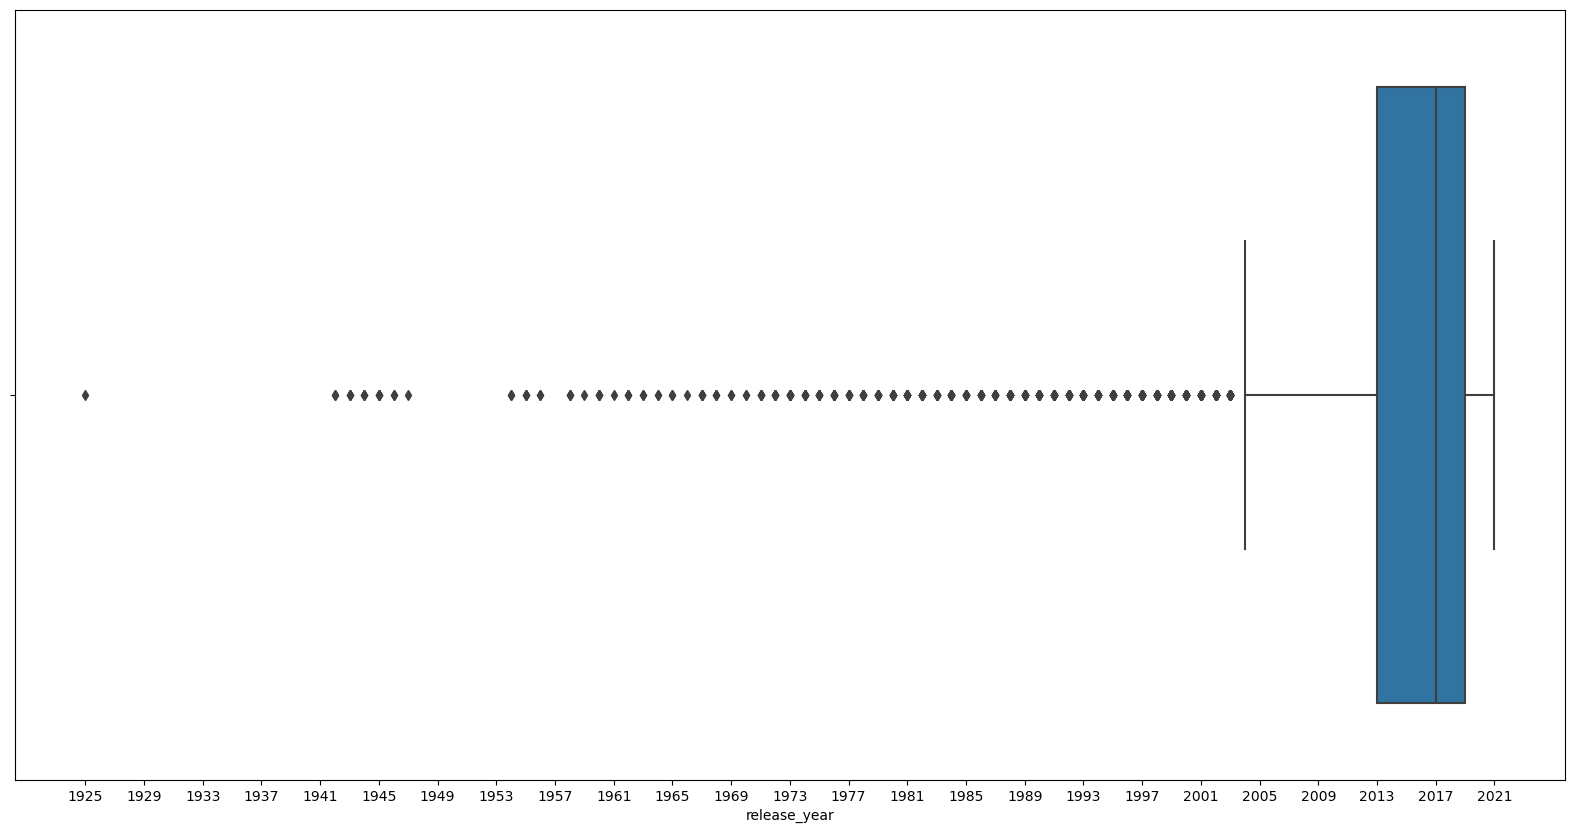

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(data=netflix,x='release_year')
plt.xticks(range(1925,2022,4))
plt.show()

### Calculating Interquartile Range (IQR) of Release Years

In [85]:
Q1=netflix['release_year'].quantile(0.25)
Q3=netflix['release_year'].quantile(0.75)
IQR=Q3-Q1

In [86]:
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)

Q1: 2013.0
Q3: 2019.0
IQR: 6.0


### Boxplot of Titles Added to Netflix Each Year

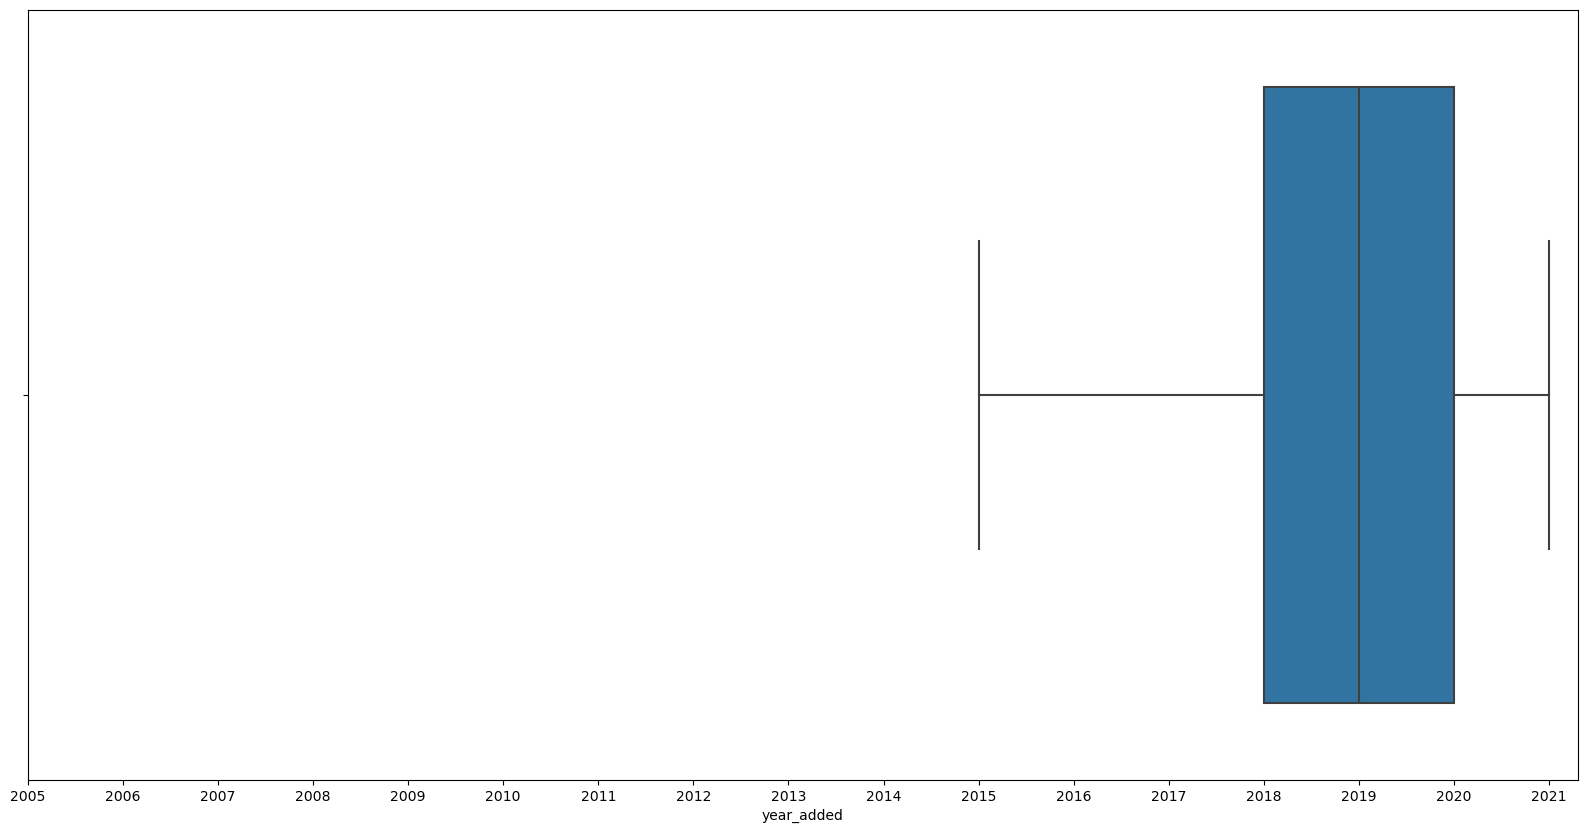

In [143]:
netflix.loc[:,'year_added']=netflix['date_added'].dt.year
plt.figure(figsize=(20,10))
sns.boxplot(data=netflix,x='year_added')
plt.xticks(range(2005,2022,1))
plt.show()

### Filtering Netflix Dataset to Remove Outliers

In [98]:
netflix_no_outlier=netflix[(netflix['release_year']>=2004) & (netflix['date_added'].dt.year>=2015)]
netflix.shape

(8033, 16)

# Exploratory Data Analysis

### Top 10 Countries by Number of Netflix Titles

<Axes: xlabel='country'>

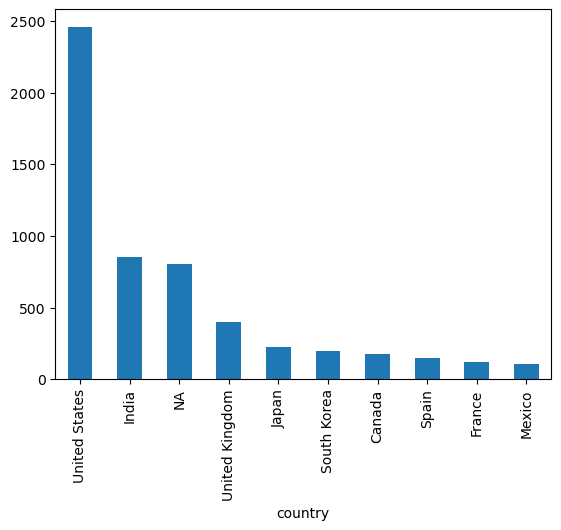

In [135]:
netflix['country'].value_counts().head(10).plot(kind='bar')

### Number of Netflix Titles Released per Year

<Axes: xlabel='release_year'>

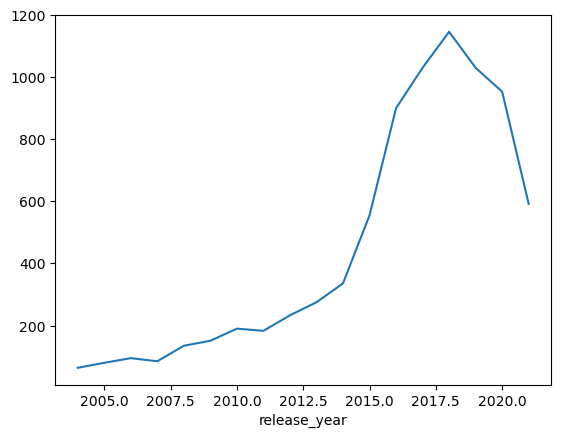

In [136]:
netflix['release_year'].value_counts().sort_index().plot(kind='line')

### Distribution of Netflix Titles by Rating

<Axes: xlabel='rating'>

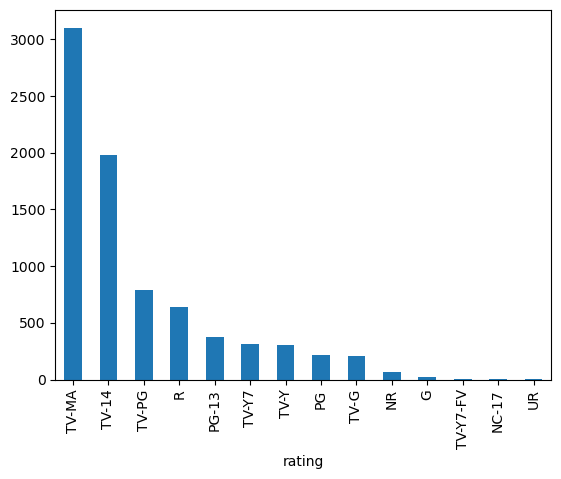

In [137]:
netflix['rating'].value_counts().plot(kind='bar')

### Top 10 Most Common Durations of Netflix Titles

<Axes: xlabel='duration'>

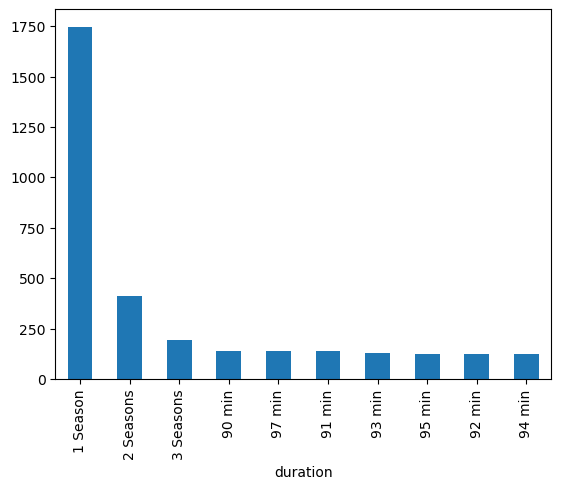

In [139]:
netflix['duration'].value_counts().head(10).plot(kind='bar')

### Share of Netflix Titles by Number of Genres

In [1]:
netflix['genre_count'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    figsize=(6,6),
    colors=['Green','yellow','pink','#ffcc99','#c2c2f0']
)
plt.title("Share of Genre Counts in Netflix Content")
plt.ylabel("")
plt.show()

NameError: name 'netflix' is not defined

### Proportion of Movies and TV Shows on Netflix

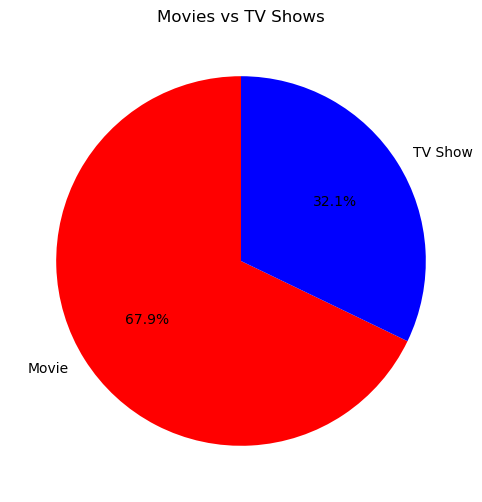

In [170]:
plt.figure(figsize=(6,6))
netflix['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['Red','blue'])
plt.title("Movies vs TV Shows")
plt.ylabel("")
plt.show()

### Number of Netflix Titles Released Each Year

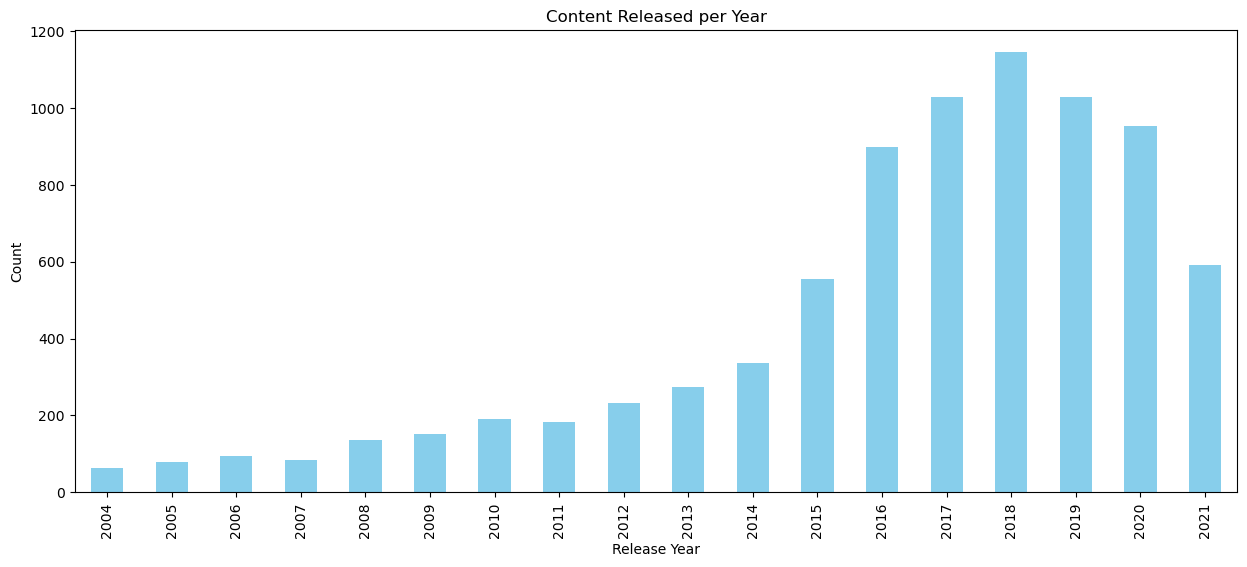

In [167]:
plt.figure(figsize=(15,6))
netflix['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Content Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

### Trend of Movies and TV Shows Released Over the Years

<Figure size 1500x600 with 0 Axes>

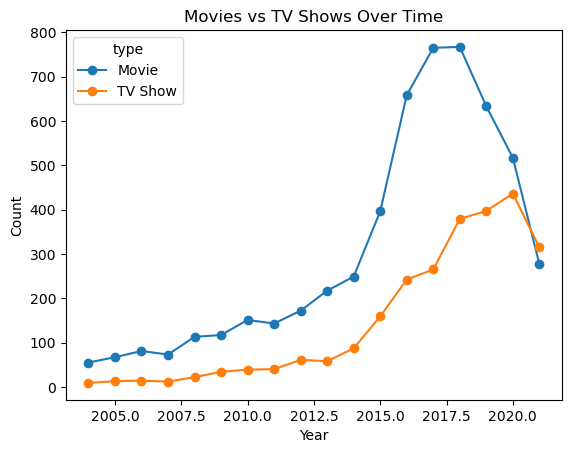

In [168]:
plt.figure(figsize=(15,6))
netflix.groupby(['release_year','type']).size().unstack().plot(kind='line', marker='o')
plt.title("Movies vs TV Shows Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### Distribution of Netflix Movies and Shows by Duration Category

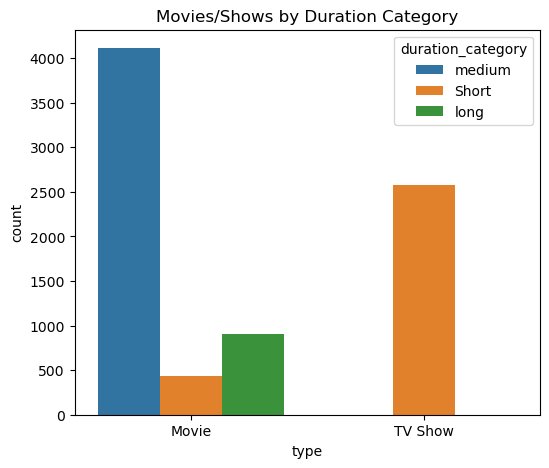

In [169]:
plt.figure(figsize=(6,5))
sns.countplot(data=netflix, x='type', hue='duration_category')
plt.title("Movies/Shows by Duration Category")
plt.show()

### Top 10 Most Frequent Genres on Netflix

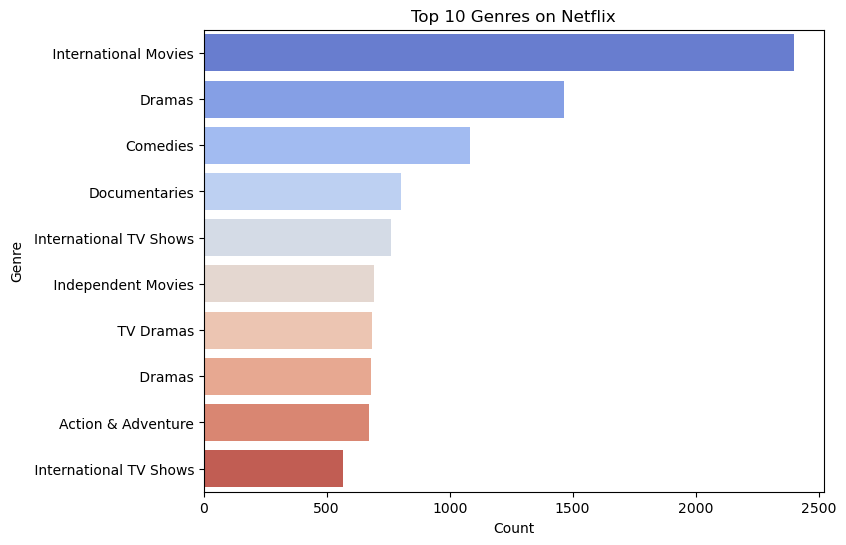

In [172]:
top_genres = netflix['listed_in'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### Average Number of Genres per Netflix Title by Release Year

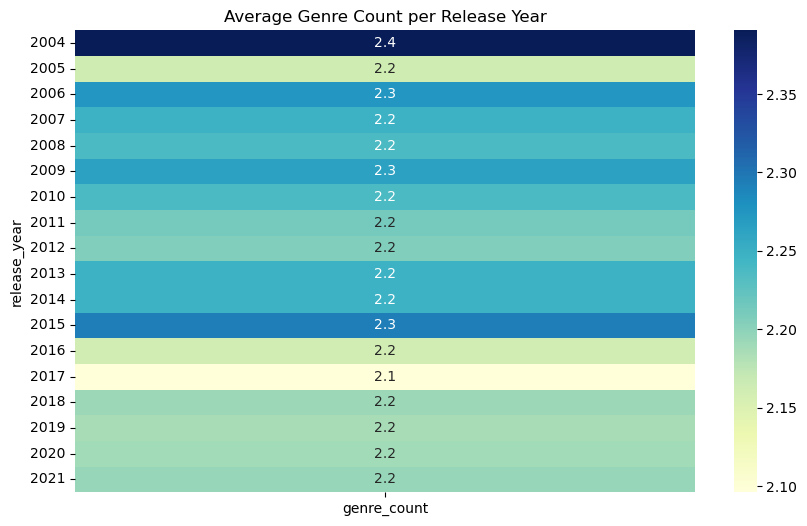

In [174]:
plt.figure(figsize=(10,6))
sns.heatmap(netflix.pivot_table(index='release_year', values='genre_count', aggfunc='mean').fillna(0), cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average Genre Count per Release Year")
plt.show()

### Correlation Between Duration, Genre Count, and Content Age

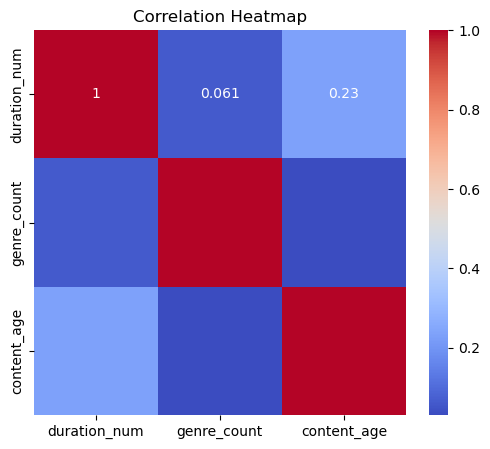

In [176]:
plt.figure(figsize=(6,5))
sns.heatmap(netflix[['duration_num','genre_count','content_age']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Quick Highlights
- **Peak release year in catalog:** 2018 with 1147 titles.
- **Peak year of additions to Netflix (by `date_added`):** 2019 with 2016 titles.
- **Movies duration:** avg ≈ 99.6 min, median ≈ 98.0 min.
- **TV seasons:** median = 1 season(s); **one-season shows share:** 67.0%.


## Catalog Composition
**Type split:** Movies 69.6% vs TV Shows 30.4%

**Top countries (by title count):**  
- United States: 3690
- India: 1046
- United Kingdom: 806
- Canada: 445
- France: 393

**Top genres:**  
- International Movies: 2752
- Dramas: 2427
- Comedies: 1674
- International TV Shows: 1351
- Documentaries: 869

**Top content ratings:**  
- TV-MA: 3207
- TV-14: 2160
- TV-PG: 863
- R: 799
- PG-13: 490


## Business Insights & Recommendations

### 1) Content Mix & Binge Strategy
- With Movies at **69.6%** and TV Shows at **30.4%**, there is strong movie presence.  
- **Action:** Sustain movie pipeline but **grow serial content** in sticky genres (e.g., Drama, Crime) to increase watch-time and retention.

### 2) Regional Localization & Originals
- Country presence shows **USA (~41.9%)** dominant, with **India (~11.9%)** and **Korea (~2.6%)** significant.  
- **Action:** Double down on **regional originals** in India and Korea where demand for local-language content is high; co-produce with top local creators.

### 3) Genre Portfolio
- Leading genres (top 5): leverage hits in these categories for seasonal slates and spin‑offs.  
- **Action:** Create **genre clusters** for marketing (e.g., "K‑Crime", "Desi Drama", "Feel‑good Comedy") and test bundle rows on home page.

### 4) Rating & Family Segments
- Ratings skew (top 5 above) can indicate an adult-heavy slate (e.g., TV‑MA).  
- **Action:** If family ratings under‑indexed, invest in **Kids/Family** and **Young Adult** to widen household reach and reduce churn.

### 5) Format Length Optimization
- Movies median ≈ **98.0 min**; many markets favor quicker sessions on weekdays.  
- **Action:** Pilot **90–100 min** movies and **mini‑series (4–6 eps)** in top genres to balance completion rates and production cost.

### 6) Supply Timing
- Additions peaked in **2019**.  
- **Action:** Align big local releases to festivals/holidays (e.g., Diwali, Chuseok) and maintain **weekly tentpoles** to smooth engagement.

### 7) Talent Strategy
- Focus on high-output directors/actors from top countries; secure first‑look deals.  
- **Action:** Use data on completion/rewatch (if available) to prioritize renewals and sequels.
